In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import sklearn
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os
import threading
import time
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
# Loading in Excel doc into a Dataframe
notebook_path = os.path.abspath("PortScan.ipynb")
temp = os.path.abspath("Data")
df = pd.read_csv(temp + "\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", low_memory = False)

In [3]:
# Edits the Column Names
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/s', '_s')

In [4]:
print(df.Label.value_counts())

PortScan    158930
BENIGN      127537
Name: Label, dtype: int64


In [5]:
# Changes BENIGN and DDoS into 0 and 1 respectively so they can be plotted
df.Label = df.Label.replace('BENIGN', 0)
df.Label = df.Label.replace('PortScan', 1)

In [6]:
# Moves Label to the front of the list
df = df[['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin']]

In [7]:
df[df.isna().any(axis=1)]

,Label,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes_s,FlowPackets_s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets_s,BwdPackets_s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
12824,0,13370,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,65535,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0
12827,0,52508,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,65535,0,32,0.0,0.0,0,0,0.0,0.0,0,0
14192,0,46058,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,229,0,32,0.0,0.0,0,0,0.0,0.0,0,0
40707,0,57119,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,65535,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0
52456,0,16506,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,229,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0
56603,0,52995,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,44,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,44,0,0,0,0,0,0,1,0,1,0,408,65535,0,44,0.0,0.0,0,0,0.0,0.0,0,0
76549,0,48337,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,229,0,32,0.0,0.0,0,0,0.0,0.0,0,0
76773,0,38790,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,126,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0
225846,0,36648,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,5438,38864,0,32,0.0,0.0,0,0,0.0,0.0,0,0
237968,0,51204,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,357,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [8]:
#Drops any rows with NA
df.dropna(how = 'any', subset = ['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin'], inplace = True)

In [9]:
# Delete rows that contain infinity from FlowBytes and FlowPackets
df = df[~df.FlowBytes_s.str.startswith('Infinity')]
df = df[~df.FlowPackets_s.str.startswith('Infinity')]

In [10]:
# Converts FlowBytes_s and FlowPackets_s to numeric columns
df[['FlowBytes_s']] = df[['FlowBytes_s']].apply(pd.to_numeric)
df[['FlowPackets_s']] = df[['FlowPackets_s']].apply(pd.to_numeric)

In [11]:
df = df[['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
   'TotalBackwardPackets', 'TotalLengthofFwdPackets',
   'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
   'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
   'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
   'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
   'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
   'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
   'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
   'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
   'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
   'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
   'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
   'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
   'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
   'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
   'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
   'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
   'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
   'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
   'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
   'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin', 'Label']]
Y = df.Label
X = df.iloc[:,:-1]
a = time.time()
xtrainDF, xtestDF, ytrainDF, ytestDF = train_test_split(X, Y, test_size=0.4, random_state=10)
sc = StandardScaler()
xtrainDF = sc.fit_transform(xtrainDF)
xtestDF = sc.transform(xtestDF)
# Instantiate model with 100 decision trees
reg = RandomForestClassifier(n_estimators=5000, bootstrap = True, max_features = 'sqrt', random_state = 10)
fit = reg.fit(xtrainDF, ytrainDF)
prediction_of_test = fit.predict(xtestDF)
MSE = (np.sqrt(sklearn.metrics.mean_squared_error(ytestDF, prediction_of_test)))
b = time.time()
print("MSE: ", MSE)
print(((b-a)/60)/60, " Hours")

MSE:  0.008360995051902407
0.1795013968149821  Hours


In [12]:
attack = 0
benign = 0
for i in prediction_of_test:
    if i == 1:
        attack = attack + 1
    else:
        benign = benign + 1

Text(0.5, 1.0, 'Normalized')

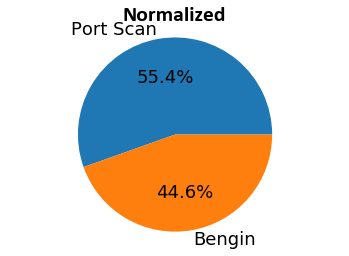

In [13]:
labels = ['Port Scan', 'Bengin']
sizes = [attack, benign]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct = '%1.1f%%')
ax.axis('equal')
ax.set_title('Normalized', fontweight='bold', fontname='calibri')

In [14]:
# # Method that takes model and splites it into test and train data and spits out an MSE
# def fit_model(df_data, df_label):
#     xtrainDF, xtestDF, ytrainDF, ytestDF = train_test_split(df_data, df_label, test_size=0.4, random_state=10)
#     reg = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state = 10)
#     fit = reg.fit(xtrainDF, ytrainDF)
#     prediction_of_test = fit.predict(xtestDF)
#     return (np.sqrt(sklearn.metrics.mean_squared_error(ytestDF, prediction_of_test)))

# # Goes down every column and subcolumn until it peaks at an MSE
# def traverse_df(df_data, df_label):
#     tmp_mse1, tmp_mse2 = fit_model(df_data, df_label), None
#     tmp_df = df_data
#     for i in df_data:
#         tmp_mse2 = fit_model(df_data.drop(i, axis = 1), df_label)
#         if tmp_mse2 < tmp_mse1:
#             tmp_mse1 = tmp_mse2
#             tmp_df = df_data.drop(i, axis = 1)
#     return tmp_mse1, tmp_df


# def core_logic(df_label, df_data, MSE_list, i, count): 
#     j = 0
#     final_MSE = 404
#     final_DF = None
#     MSE, new_df = traverse_df(df_data.drop(i, axis = 1), df_label)
#     while True:
#         print(new_df.shape)
#         if MSE < final_MSE:
#             print("While ", count, ": ", j)
#             j = j + 1
#             final_MSE = MSE
#             final_df = df_data.drop(i, axis = 1)
#         else:
#             break
#     MSE_list[final_MSE] = final_DF
            
# thread_list = []            
# df_label = df.Label
# df_data = df.iloc[:,:-1]
# MSE_list = {}
# MSE_list[fit_model(df_data, df_label)] = df_data
# count = 0
# try:
#     for i in df_data:
#         thread = threading.Thread(target=core_logic, args = (df_label, df_data, MSE_list, i, count))
#         thread_list.append(thread)
#         count = count + 1
    
#     for thread in thread_list:
#         thread.start()
        
#     for thread in thread_list:
#         thread.join()
    
# except:
#     print("Error while trying to start thread: ", i)


In [15]:
# # Takes the list of MSE's and finds the smallest one
# fMSE = 404
# fdf = None
# for key in MSE_list:
#     if fMSE > key:
#         fMSE = key
#         fdf = MSE_list[key]

In [16]:
# print(b-a)

In [17]:
# fdf

In [18]:
# print(fMSE)

In [19]:
# fdf.to_csv(os.getcwd() + '//final.csv' , index = False)

In [20]:
# for key in MSE_list:
#     print(key)